## jai ho aapki laxmi kant tiwari  ;)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

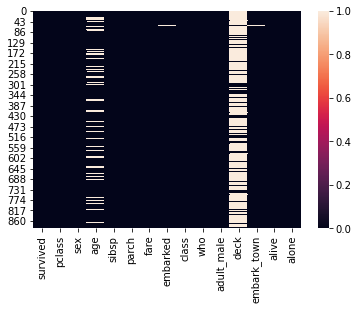

In [9]:
sns.heatmap(titanic.isnull())

In [10]:
titanic['age'].isnull().sum()/titanic.shape[0]*100 # gives the percentage null

19.865319865319865

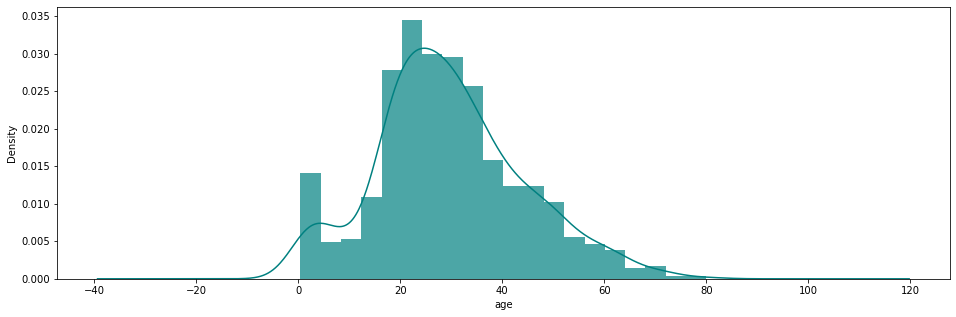

In [12]:
ax=titanic['age'].hist(bins=20,density=True,stacked=True,color='teal',alpha=0.7,figsize=(16,5))
titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('age')
plt.show()

Text(0.5, 1.0, 'male')

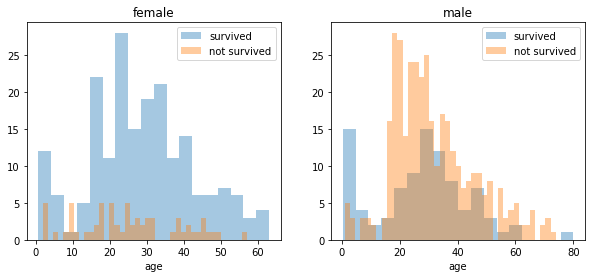

In [13]:
survived='survived'
not_survived='not survived'
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']

ax=sns.distplot(women[women['survived']==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women['survived']==0].age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('female')

ax=sns.distplot(men[men['survived']==1].age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['survived']==0].age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('male')

In [14]:
women[women['survived']==1].age.dropna()

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
874    28.0
875    15.0
879    56.0
880    25.0
887    19.0
Name: age, Length: 197, dtype: float64

In [15]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

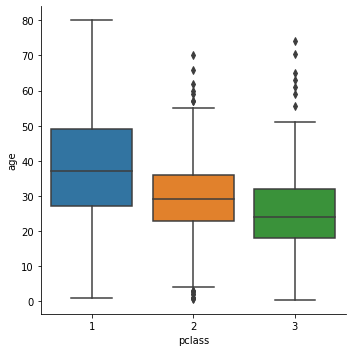

In [16]:
sns.catplot(x='pclass',y='age',data=titanic,kind='box')

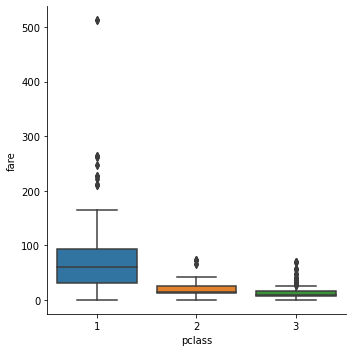

In [17]:
sns.catplot(x='pclass',y='fare',data=titanic,kind='box')

In [18]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [19]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [20]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [21]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 39
        elif pclass==2:
            return 30
        elif pclass==3:
            return 25
    else:
        return age    

In [22]:
titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)
titanic['age'].isnull().sum()

0

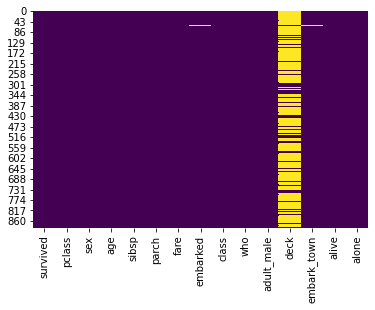

In [23]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

## analysing embarked

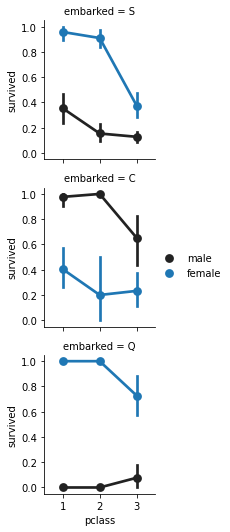

In [26]:
f=sns.FacetGrid(titanic,row='embarked',height=2.5,aspect=1)
f.map(sns.pointplot,'pclass','survived','sex',order=None,hue_order=None)
f.add_legend()

In [27]:
titanic['embarked'].isnull().sum()

2

In [28]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [29]:
common='S'
titanic['embarked'].fillna(common,inplace=True)

In [30]:
titanic['embarked'].isnull().sum()

0

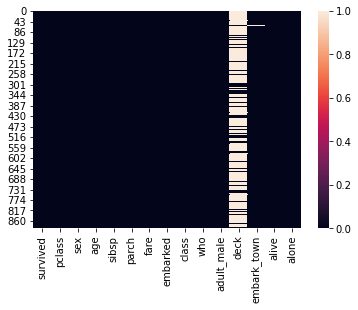

In [31]:
sns.heatmap(titanic.isnull())

In [32]:
titanic.drop(labels=['deck','embark_town','alive','class'],inplace=True,axis=1)

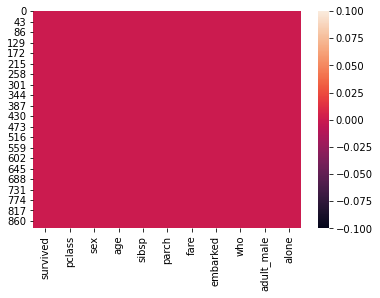

In [33]:
sns.heatmap(titanic.isnull())

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [35]:
titanic['age']=titanic['age'].astype(int)

In [36]:
titanic['fare']=titanic['fare'].astype(int)

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   survived    891 non-null    int64 
 1   pclass      891 non-null    int64 
 2   sex         891 non-null    object
 3   age         891 non-null    int32 
 4   sibsp       891 non-null    int64 
 5   parch       891 non-null    int64 
 6   fare        891 non-null    int32 
 7   embarked    891 non-null    object
 8   who         891 non-null    object
 9   adult_male  891 non-null    bool  
 10  alone       891 non-null    bool  
dtypes: bool(2), int32(2), int64(4), object(3)
memory usage: 57.6+ KB


In [38]:
titanic['pclass']=titanic['pclass'].astype(int)

In [39]:
gender={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(gender)

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,S,man,True,False
1,1,1,1,38,1,0,71,C,woman,False,False
2,1,3,1,26,0,0,7,S,woman,False,True
3,1,1,1,35,1,0,53,S,woman,False,False
4,0,3,0,35,0,0,8,S,man,True,True


In [41]:
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [42]:
ge={'man':0,'woman':1,'child':2}
titanic['who']=titanic['who'].map(ge)


In [43]:
g={True:1,False:0}
titanic['alone']=titanic['alone'].map(g)


In [44]:
ge={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ge)

In [45]:

titanic['adult_male']=titanic['adult_male'].map(g)

In [46]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1


In [47]:
titanic.drop(labels=['who'],axis=1,inplace=True)

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
X=titanic.drop('survived',axis=1)

In [52]:
y=titanic['survived']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [54]:
X_train.shape

(596, 9)

In [78]:
X_test.shape
X_test.head()

,pclass,sibsp,parch,adult_male,alone
38,3,2,0,0,0
651,2,0,1,0,0
575,3,0,0,1,1
5,3,0,0,1,1
806,1,0,0,1,1


In [56]:
model=LogisticRegression(solver='lbfgs',max_iter=400)


In [57]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [58]:
y_pred=model.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [60]:
model.score(X_test,y_test)

0.8271186440677966

## recursive feature elimination

In [61]:
from sklearn.feature_selection import RFE

In [65]:
model=LogisticRegression(solver='lbfgs',max_iter=500)
rfe=RFE(model,5,verbose=1)
rfe=rfe.fit(X,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [66]:
X.shape

(891, 9)

In [67]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [68]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [70]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [71]:
XX=X[X.columns[rfe.support_]]

In [72]:
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [73]:
X_train,X_test,y_train,y_test=train_test_split(XX,y,test_size=0.2,random_state=8,stratify=y)
model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [74]:
model.score(X_test,y_test)

0.8547486033519553

## accuracy f1 score p1r1,auc roc curve

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score,roc_curve,auc,log_loss

In [93]:
y_pred_prob=model.predict_proba(X_test)[:,1]

In [102]:
y_pred_prob

array([0.55566832, 0.87213996, 0.09376084, 0.09376084, 0.37996908,
       0.68892605, 0.20115074, 0.09376084, 0.03049173, 0.20115074,
       0.20115074, 0.84350496, 0.09376084, 0.20115074, 0.91838728,
       0.82218121, 0.61279411, 0.61279411, 0.91838728, 0.82218121,
       0.06376194, 0.13241896, 0.20115074, 0.09376084, 0.65515066,
       0.41670031, 0.84350496, 0.09376084, 0.09376084, 0.90360595,
       0.47480594, 0.09376084, 0.92916807, 0.90360595, 0.37996908,
       0.09376084, 0.09376084, 0.0219807 , 0.16917754, 0.09376084,
       0.09376084, 0.09376084, 0.68892605, 0.37996908, 0.09376084,
       0.09376084, 0.10762723, 0.65515066, 0.94318445, 0.91838728,
       0.09376084, 0.09376084, 0.37996908, 0.37996908, 0.22692227,
       0.65515066, 0.94318445, 0.91838728, 0.33796755, 0.20115074,
       0.10762723, 0.22692227, 0.65515066, 0.09376084, 0.9222574 ,
       0.09376084, 0.20115074, 0.10762723, 0.9222574 , 0.92916807,
       0.94318445, 0.09376084, 0.61279411, 0.65515066, 0.33796

In [96]:
[fpr,tpr,thr]=roc_curve(y_test,y_pred_prob)

In [100]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("log_loss:",log_loss(y_test,y_pred_prob))
print("auc:",auc(fpr,tpr))

accuracy: 0.8547486033519553
log_loss: 0.36597373727139876
auc: 0.9007246376811595


In [ ]:
# roc curve pdna h video se